In [226]:
!pip install pandas -q
!pip install matplotlib -q
!pip install scipy -q
!pip install scikit-learn -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [90]:
plt.style.use('ggplot')

In [91]:
df = pd.read_csv(f'/Users/inteoty/Documents/MTH234/dataset.csv', sep=";")
df = df.iloc[:1000]

df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
995,10,28.01.2015,0.130,5.10,5.0,8.41,1.00,0.040,43.10,0.280,42.10
996,10,27.02.2015,0.190,3.10,6.0,8.41,1.10,0.070,21.96,0.260,23.69
997,10,24.03.2015,0.190,4.40,9.0,11.50,4.10,0.100,23.50,0.020,43.90
998,10,15.04.2015,0.150,5.30,6.0,10.30,2.50,0.110,29.63,0.050,30.71


In [92]:
x = list(df['O2'])
y = list(df['BSK5'])

drop outlier data

In [93]:
droplist = list()
for i in range(len(y)):
    if y[i] > 9:
        droplist.append(i)
    if x[i] > 18:
        droplist.append(i)

x = np.delete(x, droplist)
y = np.delete(y, droplist)

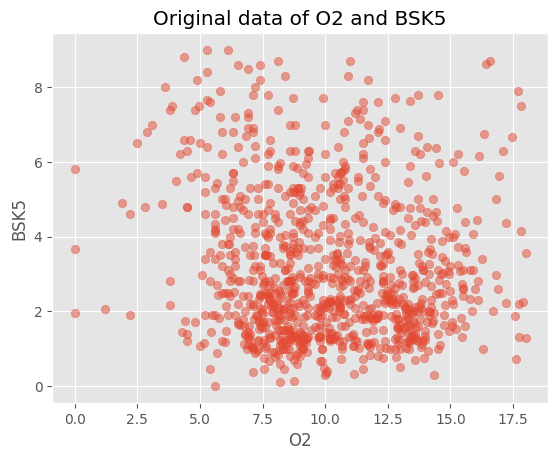

In [94]:
X = np.vstack((x, y)).T
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title("Original data of O2 and BSK5")
plt.xlabel("O2")
plt.ylabel("BSK5")
plt.show()

this part is to find the covariance matrix of the original dataset

In [95]:
pca_X = PCA(n_components=2, whiten=True)
pca_X.fit(X)

PCA(n_components=2, whiten=True)

In [96]:
cov_X = pca_X.get_covariance()
print(f'explained_variance_ratio: {cov_X}')

eVa_X = pca_X.explained_variance_
eVe_X = pca_X.components_
print(f'eigenValues: {eVa_X}')
print(f'eigenVectors: {eVe_X[0]} \n{eVe_X[1]}')

explained_variance_ratio: [[99.60764451 -9.20719445]
 [-9.20719445 14.11606143]]
eigenValues: [10.02935645  3.62432272]
eigenVectors: [-0.99437917  0.10587762] 
[0.10587762 0.99437917]


In [97]:
R_X, S_X = eVe_X, np.diag(np.sqrt(eVa_X))
print(f'Rotation Matrix: \n{R_X}')
print(f'Scaling Matrix: \n{S_X}')

Rotation Matrix: 
[[-0.99437917  0.10587762]
 [ 0.10587762  0.99437917]]
Scaling Matrix: 
[[3.16691592 0.        ]
 [0.         1.90376541]]


## White Data

$Z = X(R_x S_x)^{-1}$

In [146]:
T = R_X.dot(S_X)
Z = X.dot(np.linalg.inv(T))
Z = Z - np.mean(Z, axis=0)

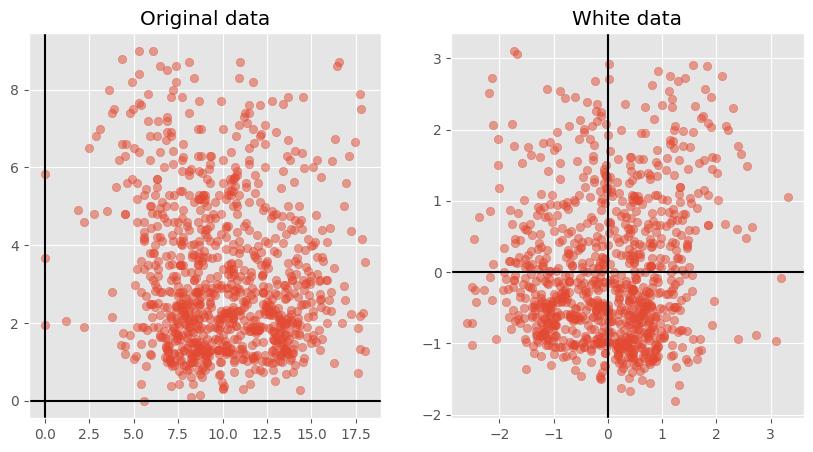

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)  
ax[0].set_title("Original data")
ax[0].axhline(0, color='black')
ax[0].axvline(0, color='black')

ax[1].scatter(Z[:, 0], Z[:, 1], alpha=0.5)
ax[1].set_title("White data")
ax[1].axhline(0, color='black')
ax[1].axvline(0, color='black')
plt.show()

In [123]:
pca_Z = PCA(n_components=2, whiten=True)
pca_Z.fit(Z)

PCA(n_components=2, whiten=True)

In [124]:
cov_Z = pca_Z.get_covariance()
print(f'explained_variance_ratio: {cov_Z}')

eVa_Z = pca_Z.explained_variance_
eVe_Z = pca_Z.components_
print(f'eigenValues: {eVa_Z}')
print(f'eigenVectors: {eVe_Z[0]} \n{eVe_Z[1]}')

explained_variance_ratio: [[1. 0.]
 [0. 1.]]
eigenValues: [1. 1.]
eigenVectors: [1. 0.] 
[0. 1.]


In [125]:
R_Z, S_Z = eVe_Z, np.diag(np.sqrt(eVa_Z))
print(f'Rotation Matrix: \n{R_Z}')
print(f'Scaling Matrix: \n{S_Z}')

Rotation Matrix: 
[[1. 0.]
 [0. 1.]]
Scaling Matrix: 
[[1. 0.]
 [0. 1.]]


# Plot the eigenData on both scatter graphs

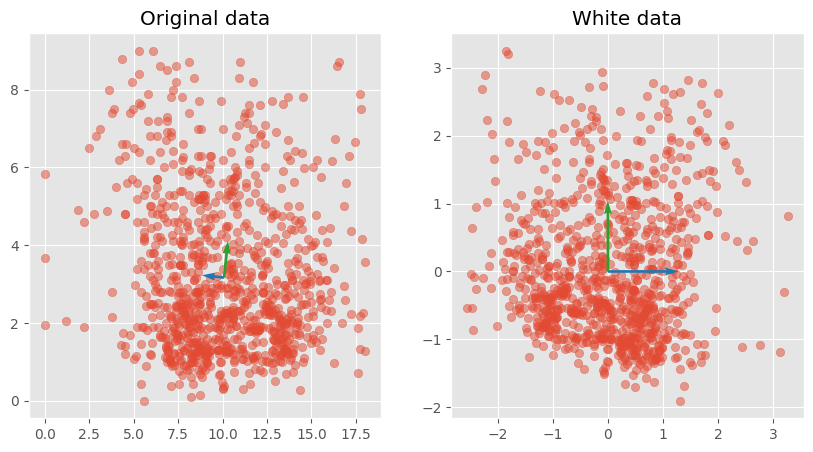

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

origi_X = np.mean(X, axis=0)
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)  
ax[0].set_title("Original data")
ax[0].quiver(origi_X[0], origi_X[1], eVe_X[0, 0] , eVe_X[0, 1], scale= (5 * np.sqrt(eVa_X[0])), color='tab:blue')
ax[0].quiver(origi_X[0], origi_X[1], eVe_X[1, 0] , eVe_X[1, 1], scale= (5 * np.sqrt(eVa_X[1])), color='tab:green')

origi_Z = np.mean(Z, axis=0)
ax[1].scatter(Z[:, 0], Z[:, 1], alpha=0.5)
ax[1].set_title("White data")
ax[1].quiver(origi_Z[0], origi_Z[1], eVe_Z[0, 0] , eVe_Z[0, 1], scale= (5 * np.sqrt(eVa_Z[0])), color='tab:blue')
ax[1].quiver(origi_Z[0], origi_Z[1], eVe_Z[1, 0] , eVe_Z[1, 1], scale= (5 * np.sqrt(eVa_Z[1])), color='tab:green')
plt.show()

## Reconstruct Z to X

$Y = Z(R_x S_x)$

### find angle of the original data
$V = R_x$

In [148]:
rad_X = math.atan(eVe_X[1, 0] / eVe_X[1, 1])
deg_X = math.degrees(rad_X)
print(f'rad_X: {rad_X}')
print(f'deg_X: {deg_X}')

rad_X: 0.1060764438174112
deg_X: 6.077732536494256


In [149]:
R_X

array([[-0.99437917,  0.10587762],
       [ 0.10587762,  0.99437917]])

In [150]:
s, c = np.sin(rad_X), np.cos(rad_X)
rotation_M = np.array([[c, -s], [s, c]])
rotation_M

array([[ 0.99437917, -0.10587762],
       [ 0.10587762,  0.99437917]])

from the rotation matrix of the original data, we can conclude the angle of the data which is 6.077

### find scale of the original data

$S = (diag(\lambda_x))^{1/2}$

In [151]:
S_X

array([[3.16691592, 0.        ],
       [0.        , 1.90376541]])

In [152]:
eVa_X

array([10.02935645,  3.62432272])

After computing the scaling matrix, we observed that the x data expanded by a factor of 3.1669, while the y data expanded by a factor of 1.9037 for the white data.

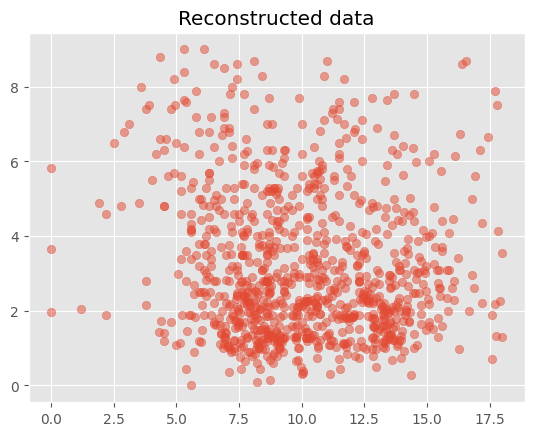

In [162]:
T = R_X.dot(S_X)
Y = Z.dot(T)
Y = Y + np.mean(X, axis=0)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
plt.title("Reconstructed data")
plt.show()

In [163]:
pca_Y = PCA(n_components=2, whiten=True)
pca_Y.fit(Y)

cov_Y = pca_Y.get_covariance()
print(f'explained_variance_ratio: {cov_Y}')


explained_variance_ratio: [[99.60764451 -9.20719445]
 [-9.20719445 14.11606143]]


In [164]:
eVa_Y = pca_Y.explained_variance_
eVe_Y = pca_Y.components_
print(f'eigenValues: {eVa_Y}')
print(f'eigenVectors: {eVe_Y[0]} \n{eVe_Y[1]}')

eigenValues: [10.02935645  3.62432272]
eigenVectors: [-0.99437917  0.10587762] 
[0.10587762 0.99437917]


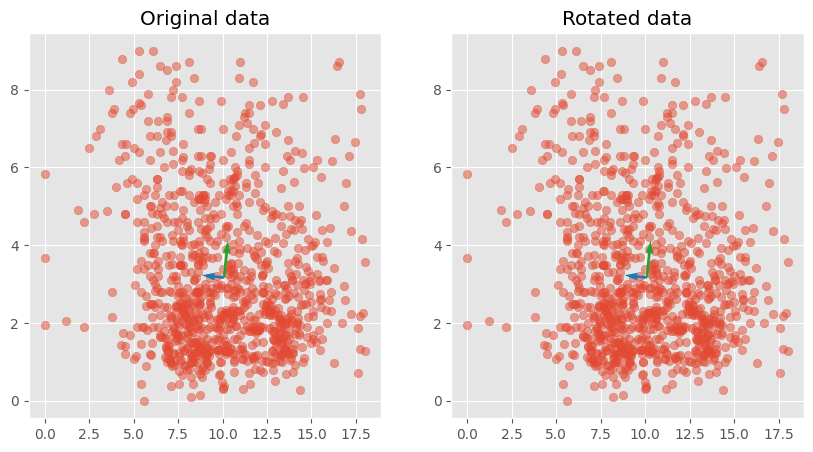

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_title("Original data")
ax[0].quiver(origi_X[0], origi_X[1], eVe_X[0, 0] , eVe_X[0, 1], scale= (5 * np.sqrt(eVa_X[0])), color='tab:blue')
ax[0].quiver(origi_X[0], origi_X[1], eVe_X[1, 0] , eVe_X[1, 1], scale= (5 * np.sqrt(eVa_X[1])), color='tab:green')

ax[1].scatter(Y[:, 0], Y[:, 1], alpha=0.5)
ax[1].set_title("Rotated data")
ax[1].quiver(origi_X[0], origi_X[1], eVe_Y[0, 0] , eVe_Y[0, 1], scale= (5 * np.sqrt(eVa_Y[0])), color='tab:blue')
ax[1].quiver(origi_X[0], origi_X[1], eVe_Y[1, 0] , eVe_Y[1, 1], scale= (5 * np.sqrt(eVa_Y[1])), color='tab:green')

plt.show()